In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import math

In [2]:
df = pd.read_csv('../data/processed/Methylation_Idea2.csv')

In [43]:
for psite in np.unique(df['PRIMARY_SITE'].values):
    print psite, df[(df['PRIMARY_SITE'] == psite)].shape

breast (1374402, 7)
endometrium (2018628, 7)
kidney (401841, 7)
large_intestine (604781, 7)
liver (1077702, 7)
lung (643909, 7)
prostate (470094, 7)
thyroid (221228, 7)
upper_aerodigestive_tract (427319, 7)
urinary_tract (825989, 7)


In [97]:
dictResults = {}
for psite in np.unique(df['PRIMARY_SITE'].values):
    dictResults[psite] = compute_chromosome_level(df[(df['PRIMARY_SITE'] == psite)])

In [8]:
def compute_window_level_old(df):
    
    dictFinal = {}
    windows_size = 1000
    chromosomes = np.unique(df['CHROMOSOME'].values)
    for chromosome in chromosomes:
        dfC_sorted = df[(df['CHROMOSOME'] == chromosome)].sort_values('POSITION')
        dictChromosome = {}
        for i in range(0,dfC_sorted.shape[0], windows_size):
            dfM = dfC_sorted[i:i+windows_size]['METHYLATION']
            dfMVC =  dfM.value_counts()
            if 'H' not in dfMVC:
                dictChromosome[i] = 0.0
            else:
                dictChromosome[i] = float(dfMVC['H']) / dfM.shape[0] 
        dictFinal[chromosome] = dictChromosome
        
    return dictFinal

def compute_window_level(df):
    
    dictFinal = {}
    windows_size = 1000
    chromosomes = np.unique(df['CHROMOSOME'].values)
    for chromosome in chromosomes:
        dfC = df[(df['CHROMOSOME'] == chromosome)]
        dictChromosome = {}
        for i in range(0,np.max(dfC['POSTION'].values), windows_size):
            dfM = dfC[(dfC['POSITION'] >= i) & (df['POSITION'] < i+windows_size)]['METHYLATION' ]
            dfMVC =  dfM.value_counts()
            if 'H' not in dfMVC:
                dictChromosome[i] = 0.0
            else:
                dictChromosome[i] = float(dfMVC['H']) / dfM.shape[0] 
        dictFinal[chromosome] = dictChromosome
        
    return dictFinal

def comparison_byChromosome_byGene(df, positionIni, positionEnd, chromosome):
    
    primary_site = np.unique(df['PRIMARY_SITE'].values)
    dictFinal = {}
    for psite in primary_site:
        dfC = df[(df['CHROMOSOME'] == chromosome) & (df['PRIMARY_SITE'] == psite)]
        dfM = dfC[(dfC['POSITION'] >= positionIni) & (dfC['POSITION'] < positionEnd)]['METHYLATION']
        dfMVC =  dfM.value_counts()
        if 'H' not in dfMVC:
            dictFinal[psite] = 0.0
        else:
            dictFinal[psite] = float(dfMVC['H']) / dfM.shape[0] 


    results = np.zeros((len(primary_site), len(primary_site)))
    for i, psite1 in enumerate(primary_site):
        for j, psite2 in enumerate(primary_site):
            results[i][j] = math.log((dictFinal[psite1]+1) / (dictFinal[psite2]+1), 2)

    return results


def compute_chromosome_level(df):
    
    dictFinal = {}

    chromosomes = np.unique(df['CHROMOSOME'].values)
    for chromosome in chromosomes:
        dfC_sorted = df[(df['CHROMOSOME'] == chromosome)].sort_values('POSITION')
        dfM = dfC_sorted['METHYLATION']
        dfMVC =  dfM.value_counts()
        if 'H' not in dfMVC:
            dictFinal[chromosome] = 0.0
        else:
            dictFinal[chromosome] = float(dfMVC['H']) / dfM.shape[0] 
        
    return dictFinal

def plot_comparison_by_chromosome(dictResults, chromosomes, primary_site):
    
    dictChromosomes = {}
    for chromosome in chromosomes:
        results = np.zeros((len(primary_site), len(primary_site)))
        for i, psite1 in enumerate(primary_site):
            for j, psite2 in enumerate(primary_site):
                """if (dictResults[psite1][chromosome] == 0) or (dictResults[psite2][chromosome] == 0):
                    results[i][j] = np.nan
                else:"""
                results[i][j] = math.log((dictResults[psite1][chromosome]+1) / (dictResults[psite2][chromosome]+1), 2)
                
        dictChromosomes[chromosome] = results
    return dictChromosomes

In [9]:
dictAge = {'0-20' : [0,20], '20-40' : [20,40], '40-60' : [40,60], '60+' : [60,100]}

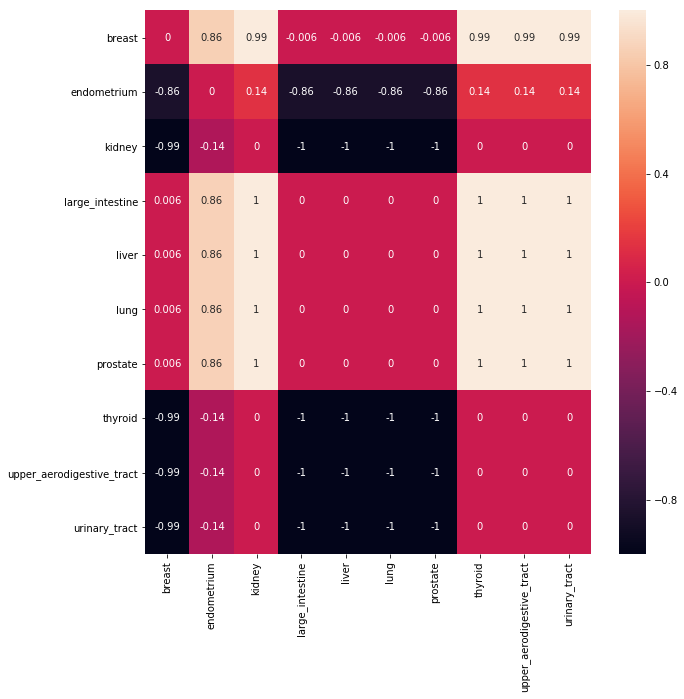

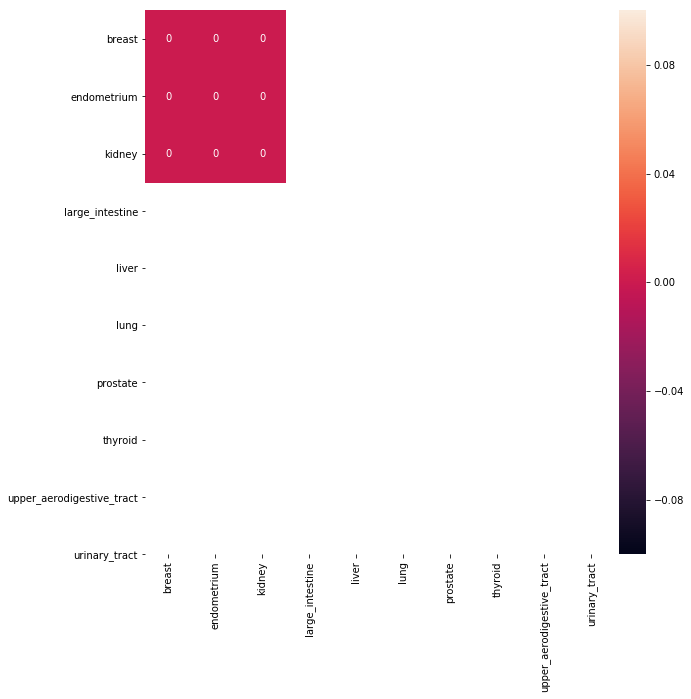

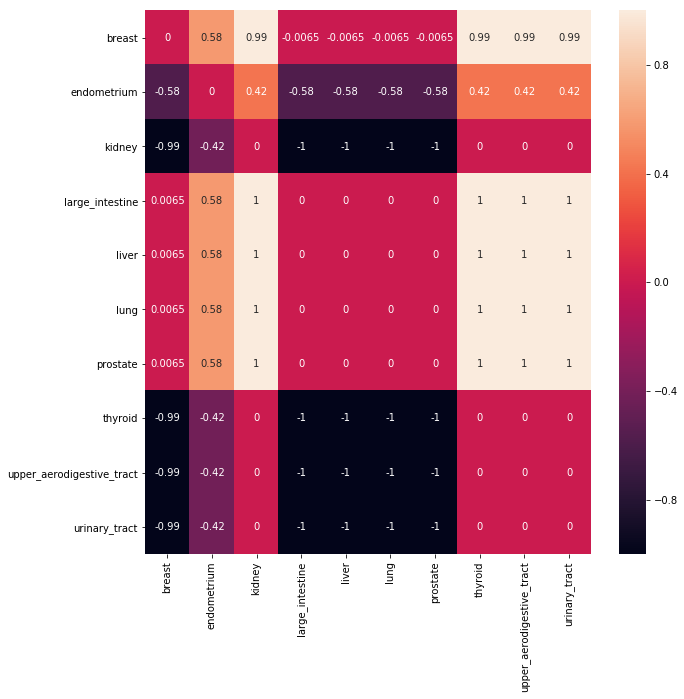

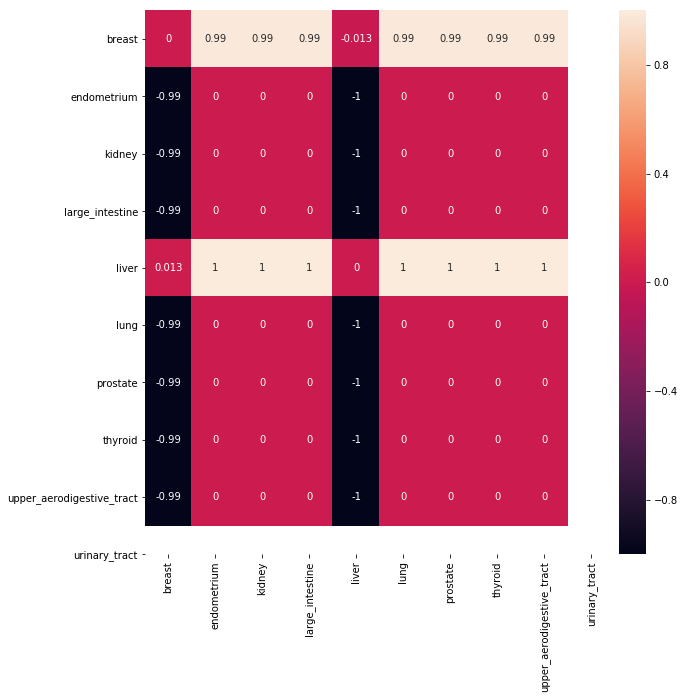

In [10]:
for k, v in dictAge.items():
    
    ResultsAPC = comparison_byChromosome_byGene(df[(df['age'] >= v[0]) & (df['age'] < v[1])], 112707498, 112846239, 5)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(ResultsAPC, xticklabels=np.unique(df['PRIMARY_SITE'].values), yticklabels=np.unique(df['PRIMARY_SITE'].values), ax=ax, annot=True)
    plt.savefig('../plots/Heatmap_CancerVSCancer_APC_{}.png'.format(k))

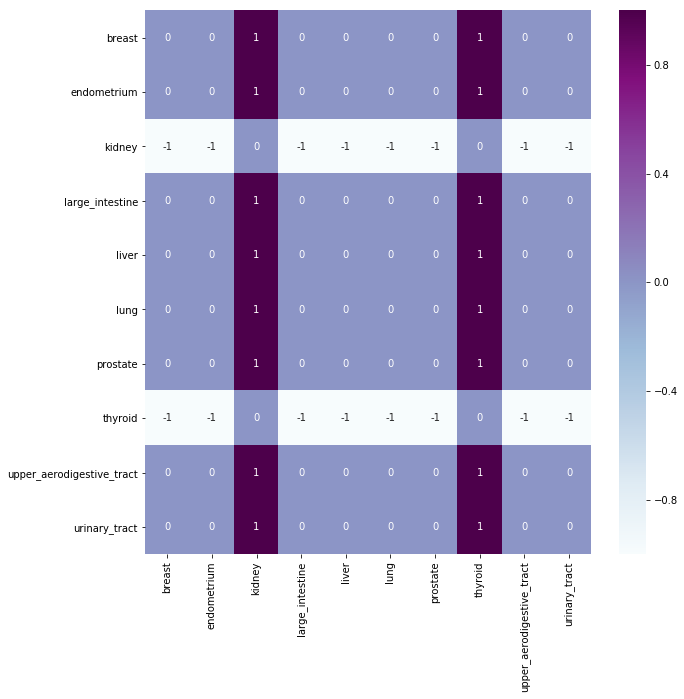

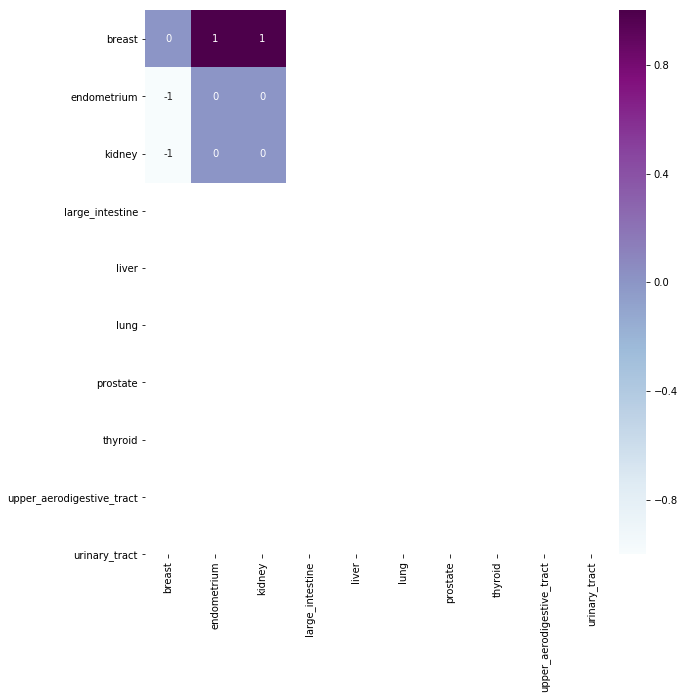

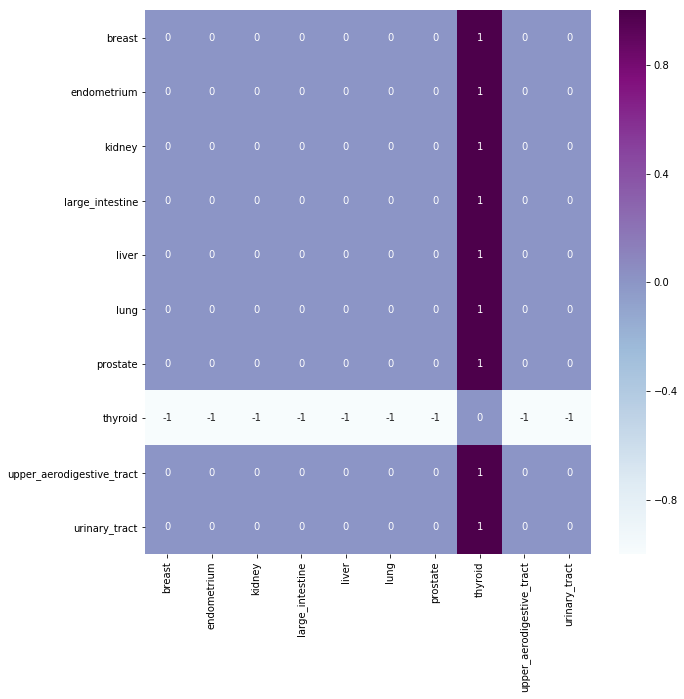

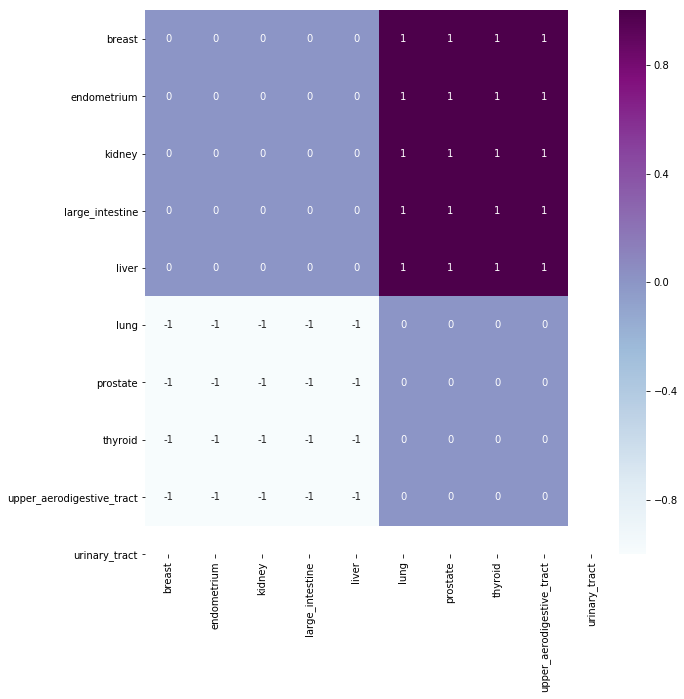

In [17]:
for k, v in dictAge.items():
    ResultsCDKN2A = comparison_byChromosome_byGene(df[(df['age'] >= v[0]) & (df['age'] < v[1])], 21967752, 21995301, 9)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(ResultsCDKN2A, xticklabels=np.unique(df['PRIMARY_SITE'].values), yticklabels=np.unique(df['PRIMARY_SITE'].values), ax=ax, annot=True, cmap="BuPu")
    plt.savefig('../plots/Heatmap_CancerVSCancer_CDKN2A_{}2.png'.format(k))

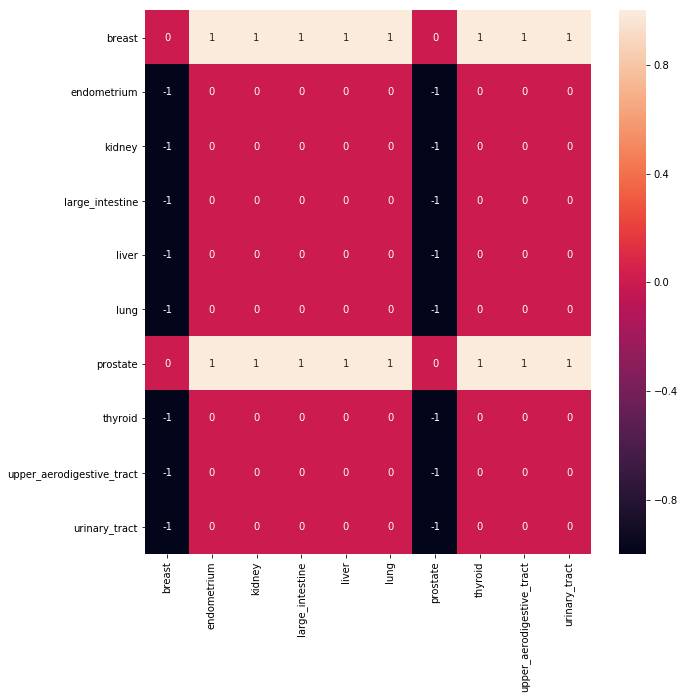

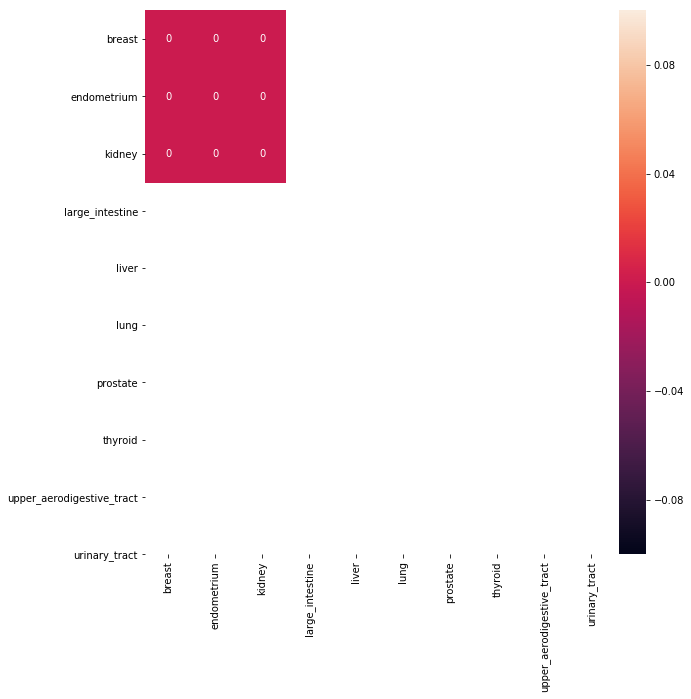

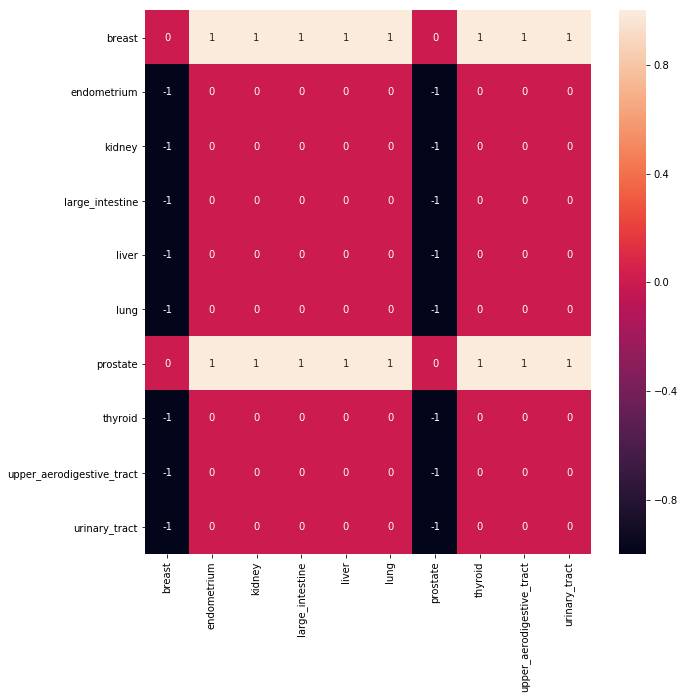

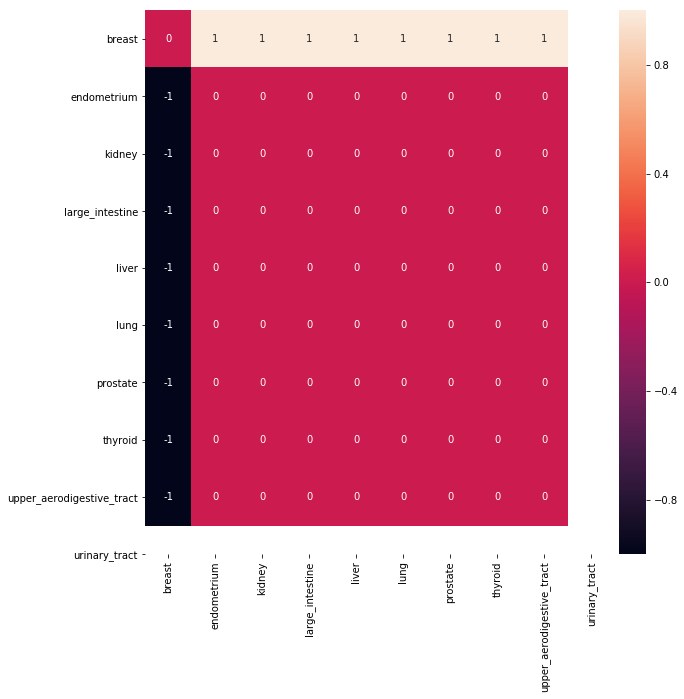

In [12]:
for k, v in dictAge.items():
    ResultsGSTP1 = comparison_byChromosome_byGene(df[(df['age'] >= v[0]) & (df['age'] < v[1])], 67583595, 67586660, 11)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(ResultsGSTP1, xticklabels=np.unique(df['PRIMARY_SITE'].values), yticklabels=np.unique(df['PRIMARY_SITE'].values), ax=ax, annot=True)
    plt.savefig('../plots/Heatmap_CancerVSCancer_GSTP1_{}.png'.format(k))